## Libraries and Data

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.impute import KNNImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


sns.set()

In [28]:
gender = pd.read_csv('data/gender_submission.csv')
test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')

In [29]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# Train

## Exploration

In [30]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [31]:
train.groupby('Ticket')['PassengerId'].count().sort_values(ascending=False).head(15)

Ticket
1601            7
CA. 2343        7
347082          7
CA 2144         6
347088          6
3101295         6
S.O.C. 14879    5
382652          5
PC 17757        4
4133            4
2666            4
19950           4
113781          4
349909          4
LINE            4
Name: PassengerId, dtype: int64

In [32]:
train[train['Ticket']=='LINE']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


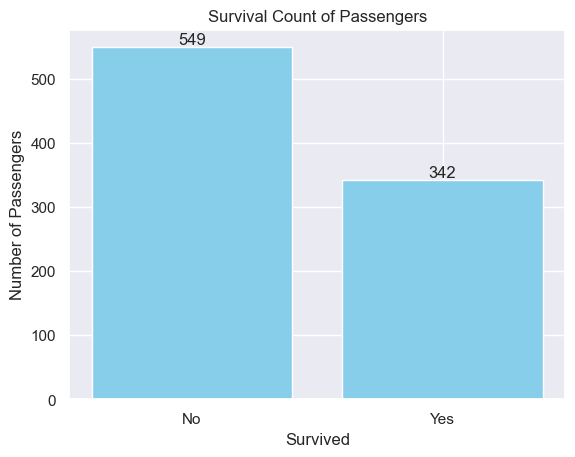

In [34]:
### Survivors Chart

surv = train.groupby('Survived')['PassengerId'].count().reset_index()

# Create the bar chart
plt.bar(surv['Survived'], surv['PassengerId'], color='skyblue')

# Set x-ticks to the distinct values of 'Survived' and label them as 'No' and 'Yes'
plt.xticks(surv['Survived'], labels=['No', 'Yes'])

# Annotate the bars with the values
for index, value in enumerate(surv['PassengerId']):
    plt.text(surv['Survived'][index], value, str(value), ha='center', va='bottom')

# Labels and title (optional)
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.title('Survival Count of Passengers')

# Show the plot
plt.show()

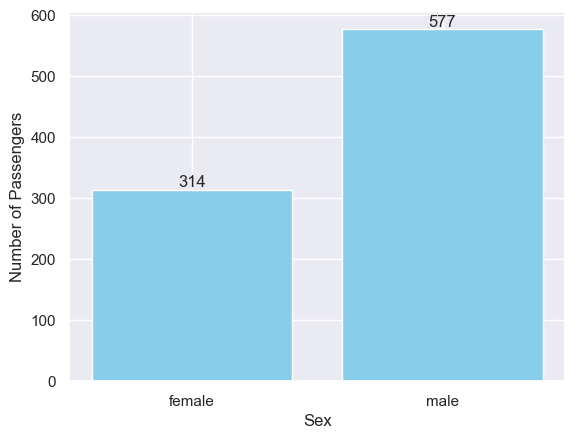

In [35]:
## Sex distribution

surv = train.groupby('Sex')['PassengerId'].count().reset_index()

# Create the bar chart
plt.bar(surv['Sex'], surv['PassengerId'], color='skyblue')

# X values
plt.xticks(surv['Sex'])

# Annotate the bars with the values
for index, value in enumerate(surv['PassengerId']):
    plt.text(surv['Sex'][index], value, str(value), ha='center', va='bottom')

# Labels and title (optional)
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')

# Show the plot
plt.show()

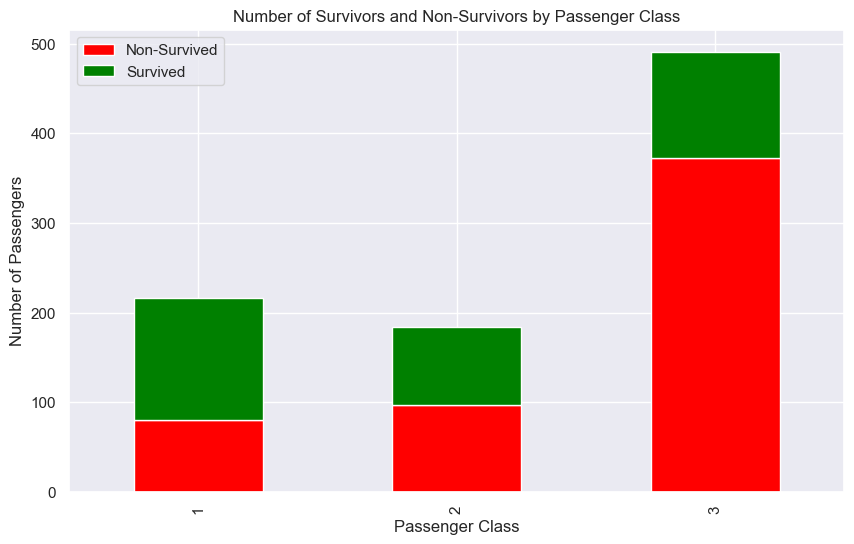

In [36]:
# Survivors by Class

# Group by Pclass and Survived, and count the number of occurrences
pclass_survival_counts = train.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)

# Plot the bar chart
ax = pclass_survival_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])

# Set plot labels and title
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.title('Number of Survivors and Non-Survivors by Passenger Class')
plt.legend(['Non-Survived', 'Survived'])

# Show the plot
plt.show()

/var/folders/w3/vvsc11d1723ctsxm4jfwvb_c0000gn/T/ipykernel_93563/3149424708.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'])
/Users/ezequielrioskaliman/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Density'>

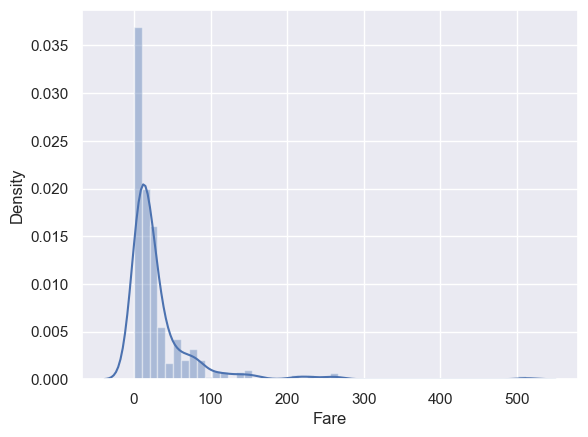

In [37]:
# Fare distribution
sns.distplot(train['Fare'])

/var/folders/w3/vvsc11d1723ctsxm4jfwvb_c0000gn/T/ipykernel_93563/2002343806.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'])
/Users/ezequielrioskaliman/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

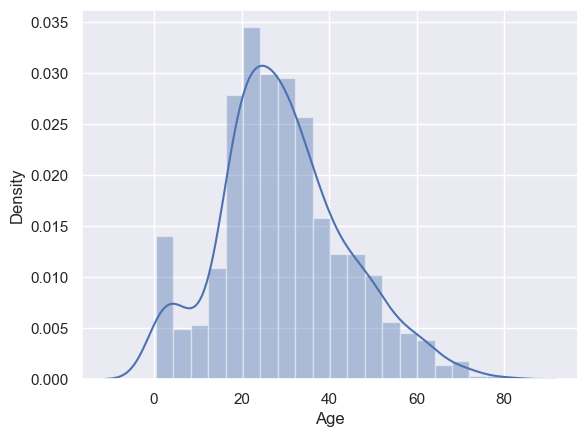

In [38]:
# Age distribution

sns.distplot(train['Age'])

/var/folders/w3/vvsc11d1723ctsxm4jfwvb_c0000gn/T/ipykernel_93563/1080093972.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Parch'])
/Users/ezequielrioskaliman/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Parch', ylabel='Density'>

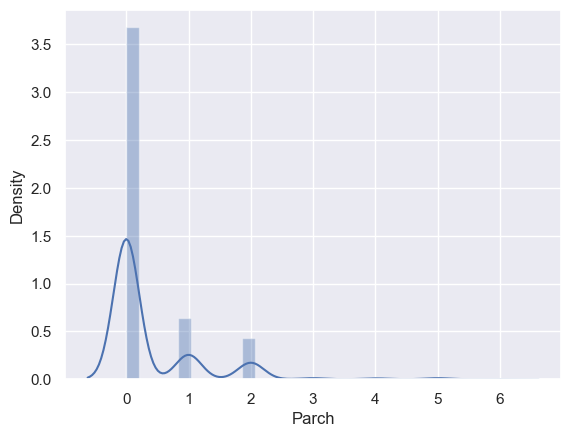

In [39]:
# Parch distribution 

sns.distplot(train['Parch'])

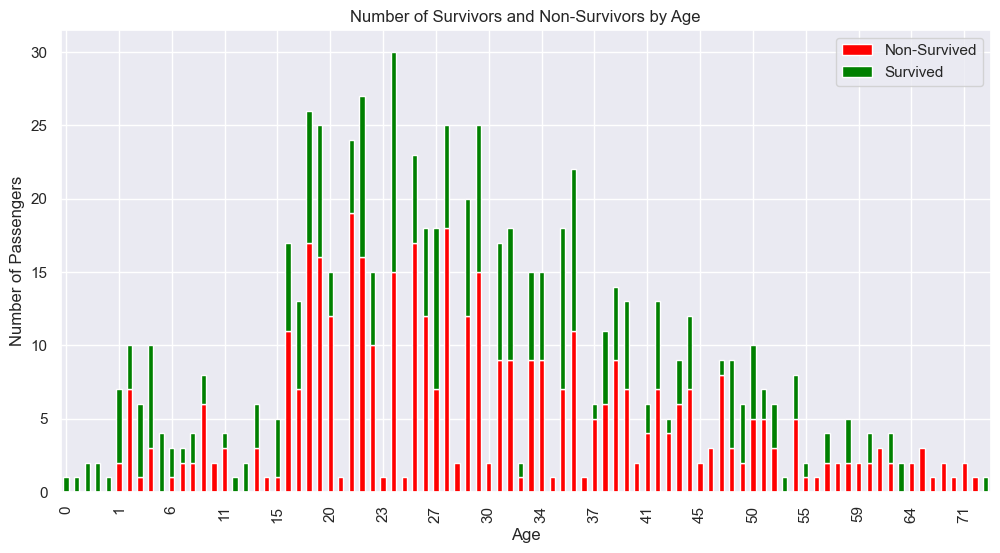

In [40]:
# Survivors by Age

# Group by Age and Survived, and count the number of occurrences
age_survival_counts = train.groupby(['Age', 'Survived']).size().unstack(fill_value=0)

# Plot the stacked bar chart
ax = age_survival_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'green'])

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Number of Survivors and Non-Survivors by Age')
plt.legend(['Non-Survived', 'Survived'])

# Show fewer x-tick labels
tick_labels = age_survival_counts.index
tick_positions = range(0, len(tick_labels), 5)
plt.xticks(ticks=tick_positions, labels=[int(tick_labels[i]) for i in tick_positions])

# Show the plot
plt.show()

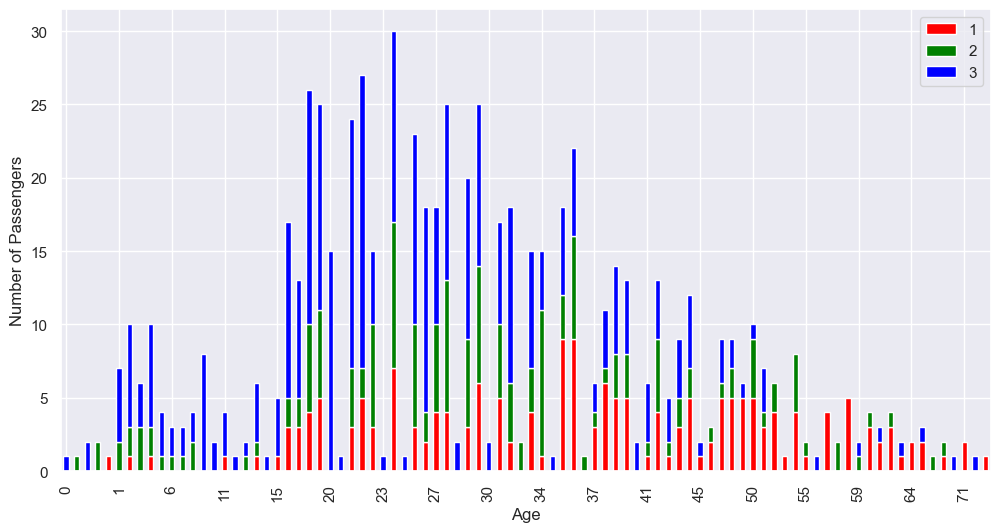

In [41]:
# Total class passengers by age to check if is any bias here on survivors

# Group by Age and Survived, and count the number of occurrences
age_survival_counts = train.groupby(['Age', 'Pclass']).size().unstack(fill_value=0)

# Plot the stacked bar chart
ax = age_survival_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'green', 'blue'])

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()

# Show fewer x-tick labels
tick_labels = age_survival_counts.index
tick_positions = range(0, len(tick_labels), 5)
plt.xticks(ticks=tick_positions, labels=[int(tick_labels[i]) for i in tick_positions])

# Show the plot
plt.show()

In [42]:
train_clean['Age'].sort_values().head(10)

803    0.42
755    0.67
644    0.75
469    0.75
78     0.83
831    0.83
305    0.92
827    1.00
381    1.00
164    1.00
Name: Age, dtype: float64

In [45]:
# Confirm if <= 6 have a better survive rate
(train[(train['Age']<7)].groupby('Survived').count()/train[(train['Age']<7)].count())['Age']

Survived
0    0.297872
1    0.702128
Name: Age, dtype: float64

/Users/ezequielrioskaliman/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


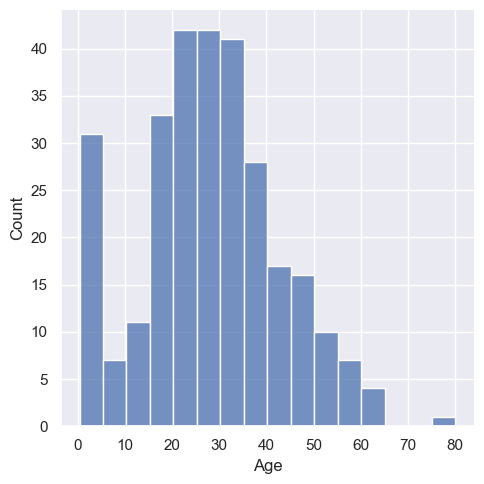

In [51]:
# Survivors distribution by age

sns.displot(train[train['Survived']==1]['Age'])

## Cleaning

In [52]:
# Drop columns not useful or columns with most of the values null

train_clean = train.copy()
train_clean.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [53]:
# Fix data types

train_clean['Survived'] = train_clean['Survived'].astype(str)
train_clean['Pclass'] = train_clean['Pclass'].astype(str)

In [54]:
# Fill null values in age column given that we have 12% of null values - 

imputer = KNNImputer(n_neighbors=5)
train_clean[['Age']] = imputer.fit_transform(train_clean[['Age']])

In [55]:
# Delete outliers for Fare column

mean_fare = train_clean['Fare'].mean()
std_fare = train_clean['Fare'].std()

train_clean['fare_norm'] = (np.abs(train_clean['Fare'] - mean_fare)) / std_fare

train_clean = train_clean[train_clean['fare_norm']<3]
train_clean.drop(columns='fare_norm',inplace=True)

In [56]:
# Delete outliers for Fare column

mean_age = train_clean['Age'].mean()
std_age = train_clean['Age'].std()

train_clean['age_norm'] = (np.abs(train_clean['Age'] - mean_age)) / std_age

train_clean = train_clean[train_clean['age_norm']<3]
train_clean.drop(columns='age_norm',inplace=True)

In [57]:
train_clean.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,864,864,864,864.000000,864.000000,864.000000,864.000000,862
unique,2,3,2,NaN,NaN,NaN,NaN,3
top,0,3,male,NaN,NaN,NaN,NaN,S
freq,537,489,562,NaN,NaN,NaN,NaN,632
mean,NaN,NaN,NaN,29.322935,0.520833,0.368056,26.500689,NaN
std,NaN,NaN,NaN,12.490450,1.104937,0.794651,29.400192,NaN
min,NaN,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,22.000000,0.000000,0.000000,7.895800,NaN
50%,NaN,NaN,NaN,29.699118,0.000000,0.000000,13.860400,NaN
75%,NaN,NaN,NaN,35.000000,1.000000,0.000000,29.775000,NaN


In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
train_clean['Pclass'].unique()

array(['3', '1', '2'], dtype=object)

## Feature Engineering

In [60]:
# Create a new column with all the familiars travelling
train_clean['familiars'] = train_clean['SibSp'] + train_clean['Parch']

# Drop parch given that we saw that in the results have not enough power
train_clean.drop(columns='Parch',inplace=True)

In [61]:
train_clean['Age < 7'] = train_clean['Age'] < 7 

In [62]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 864 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   864 non-null    object 
 1   Pclass     864 non-null    object 
 2   Sex        864 non-null    object 
 3   Age        864 non-null    float64
 4   SibSp      864 non-null    int64  
 5   Fare       864 non-null    float64
 6   Embarked   862 non-null    object 
 7   familiars  864 non-null    int64  
 8   Age < 7    864 non-null    bool   
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 61.6+ KB


## Split Dependant and Independant variables

In [63]:
y_train = train_clean['Survived']
x_train = train_clean.drop(columns='Survived')

## Create Dummies

In [64]:
# Create Dummies

x_train = pd.get_dummies(x_train, drop_first=True)

In [65]:
x_train.describe(include='all')

,Age,SibSp,Fare,familiars,Age < 7,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
count,864.000000,864.000000,864.000000,864.000000,864,864,864,864,864,864
unique,NaN,NaN,NaN,NaN,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,False,False,True,True,False,True
freq,NaN,NaN,NaN,NaN,817,681,489,562,788,632
mean,29.322935,0.520833,26.500689,0.888889,NaN,NaN,NaN,NaN,NaN,NaN
std,12.490450,1.104937,29.400192,1.602914,NaN,NaN,NaN,NaN,NaN,NaN
min,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,22.000000,0.000000,7.895800,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,29.699118,0.000000,13.860400,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,35.000000,1.000000,29.775000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


## Feature Selecting

In [66]:
# Check Multicollinearity

variables = x_train[['Age','SibSp','Fare']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

vif

,VIF,features
0,1.749444,Age
1,1.255686,SibSp
2,1.983707,Fare


## Feature Standarization

In [67]:
#### After test both models I decided that works better with the non-standarized metrics

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train[['Age','SibSp','Fare','familiars']])

StandardScaler()

In [68]:
inputs_scaled = scaler.transform(x_train[['Age','SibSp','Fare','familiars']])
scaled_x_train = x_train.copy()
scaled_x_train [['Age','SibSp','Fare','familiars']] = scaler.transform(x_train[['Age','SibSp','Fare','familiars']])

In [69]:
scaled_x_train

,Age,SibSp,Fare,familiars,Age < 7,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,-0.586622,0.433911,-0.655160,0.069358,False,False,True,True,False,True
1,0.695098,0.433911,1.524090,0.069358,False,False,False,False,False,False
2,-0.266192,-0.471642,-0.632188,-0.554867,False,False,True,False,False,True
3,0.454776,0.433911,0.905257,0.069358,False,False,False,False,False,True
4,0.454776,-0.471642,-0.627934,-0.554867,False,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,-0.186085,-0.471642,-0.459470,-0.554867,False,True,False,True,False,True
887,-0.826945,-0.471642,0.119092,-0.554867,False,False,False,False,False,True
888,0.030135,0.433911,-0.103824,1.317809,False,False,True,False,False,True
889,-0.266192,-0.471642,0.119092,-0.554867,False,False,False,True,False,False


## Create Model

In [70]:
reg = LogisticRegression()
reg.fit(x_train,y_train)

/Users/ezequielrioskaliman/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [90]:
# Get the predictions and store them in the 'predicted' column
train_y_pred = reg.predict(x_train)

train_results = pd.DataFrame(y_train)
train_results['predicted'] = train_y_pred
train_results['ok'] = train_results['Survived'] == train_results['predicted']

<Figure size 1000x800 with 0 Axes>

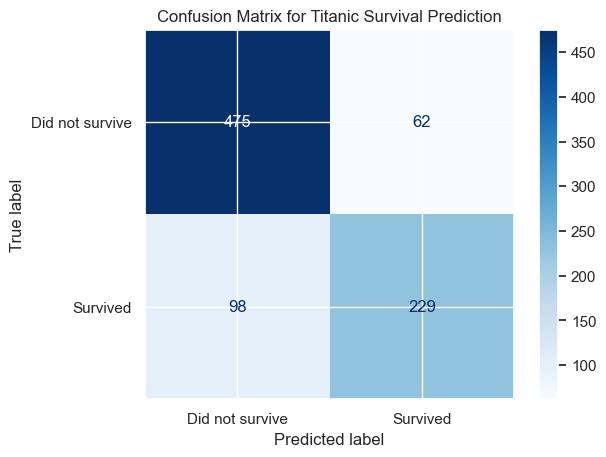

Accuracy: 0.8148
Precision: 0.7869
Recall: 0.7003
F1 Score: 0.7411


In [91]:
# Create the confusion matrix
cm = confusion_matrix(y_train, train_y_pred)

# Create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did not survive', 'Survived'])

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Titanic Survival Prediction')
plt.show()

# Calculate and print additional metrics
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

In [72]:
# check variables weight

reg_summary = pd.DataFrame(scaled_x_train.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_[0]
reg_summary

,Features,Weights
0,Age,-0.020368
1,SibSp,-0.236268
2,Fare,0.012666
3,familiars,-0.204414
4,Age < 7,1.717087
5,Pclass_2,-0.481169
6,Pclass_3,-1.450296
7,Sex_male,-2.592747
8,Embarked_Q,-0.042018
9,Embarked_S,-0.405207


# Validation with test df

In [73]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Cleaning

In [74]:
# Drop columns not useful or columns with most of the values null

test_clean = test.copy()
test_clean.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [75]:
# Fix data types
test_clean['Pclass'] = test_clean['Pclass'].astype(str)

In [76]:
# Fill null values in age column given that we have 12% of null values - 

imputer = KNNImputer(n_neighbors=5)
test_clean[['Age']] = imputer.fit_transform(test_clean[['Age']])
test_clean[['Fare']] = imputer.fit_transform(test_clean[['Fare']])

In [77]:
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    object 
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 23.0+ KB


## Feature Engineering

In [78]:
# Create a new column with all the familiars travelling
test_clean['familiars'] = test_clean['SibSp'] + test_clean['Parch']

# Drop parch given that we saw that in the results have not enough power
test_clean.drop(columns='Parch',inplace=True)

In [79]:
test_clean['Age < 7'] = test_clean['Age'] < 7 

## Create Dummies

In [80]:
# Create Dummies

x_test = pd.get_dummies(test_clean, drop_first=True)

## Predict Results

In [81]:
reg.predict(x_test)

array(['0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1',
       '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0',
       '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0',
       '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1',
       '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1',
       '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1',
       '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0',
       '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1',
       '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1',
       '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0

In [82]:
#Save the test predictions and add them to the dataset
y_test_pred = reg.predict(x_test).astype(int)

gender['Predicted'] = reg.predict(x_test).astype(int)
gender['ok'] = gender['Survived'] == gender['Predicted']

<Figure size 1000x800 with 0 Axes>

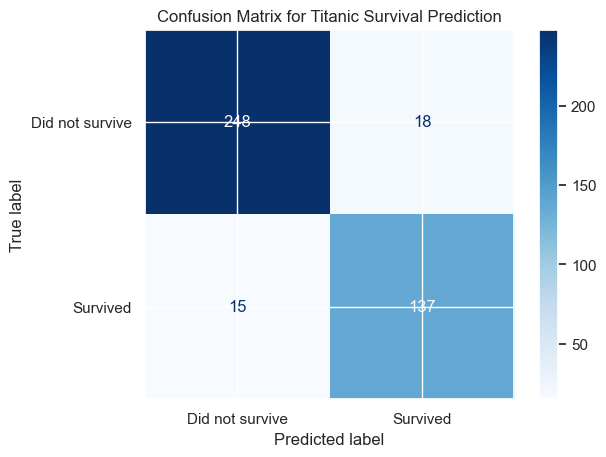

Accuracy: 0.9211
Precision: 0.8839
Recall: 0.9013
F1 Score: 0.8925


In [87]:
#Create a Variable with survived values
y_test = gender['Survived']

# Create the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did not survive', 'Survived'])

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Titanic Survival Prediction')
plt.show()

# Calculate and print additional metrics
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

In [88]:
df = pd.DataFrame(gender['PassengerId'])
df['Survived'] = reg.predict(x_test).astype(int)
df.to_csv('submission.csv',index=False)

In [89]:
gender

,PassengerId,Survived,Predicted,ok
0,892,0,0,True
1,893,1,0,False
2,894,0,0,True
3,895,0,0,True
4,896,1,0,False
...,...,...,...,...
413,1305,0,0,True
414,1306,1,1,True
415,1307,0,0,True
416,1308,0,0,True
